In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
pd.options.display.float_format = "{:.2f}".format

# Get The Data And Showing The Tables

In [7]:
transactions = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/transactions.csv')

In [10]:
transactions.head(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.00,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR


In [11]:
products = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/products.csv')

In [12]:
products.sample(5)

,product_code,product_type
261,Prod262,Own Brand
100,Prod101,Own Brand
8,Prod009,Own Brand
271,Prod272,Own Brand
263,Prod264,Distribution


In [13]:
markets = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/markets.csv')

In [14]:
markets.sample(5)

,markets_code,markets_name,zone
13,Mark014,Hyderabad,South
9,Mark010,Kochi,South
7,Mark008,Lucknow,North
6,Mark007,Bhopal,Central
1,Mark002,Mumbai,Central


In [15]:
customers = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/customers.csv')

In [16]:
customers.sample(5)

,customer_code,custmer_name,customer_type
23,Cus024,Power,E-Commerce
27,Cus028,Sage,E-Commerce
12,Cus013,Unity Stores,Brick & Mortar
28,Cus029,Electricalsocity,E-Commerce
9,Cus010,Atlas Stores,Brick & Mortar


In [20]:
date = pd.read_csv('https://raw.githubusercontent.com/tuhinhussain1995/PROJECT-Data-Analysis-Sales-Insights-PowerBI/refs/heads/master/date.csv')


In [21]:
date.sample(5)

,date,cy_date,year,month_name,date_yy_mmm
1022,2020-03-19,2020-03-01,2020,March,20-Mar
43,2017-07-14,2017-07-01,2017,July,17-Jul
711,2019-05-13,2019-05-01,2019,May,19-May
793,2019-08-03,2019-08-01,2019,August,19-Aug
468,2018-09-12,2018-09-01,2018,September,18-Sep


# Transactions

In [22]:
transactions.dtypes

product_code      object
customer_code     object
market_code       object
order_date        object
sales_qty          int64
sales_amount     float64
currency          object
dtype: object

# Check Null Values

In [23]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

# Sales_amount below 1

In [24]:
transactions[transactions['sales_amount'] <= 0].sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
132556,Prod312,Cus003,Mark006,2017-12-19,1,0.00,INR
108127,Prod290,Cus029,Mark011,2018-12-11,1,0.00,INR
8419,Prod053,Cus017,Mark011,2019-04-05,6,0.00,INR


In [25]:
len(transactions[transactions['sales_amount'] <= 0])

1611

In [26]:
transactions.shape

(150283, 7)

In [27]:
transactions.drop(transactions[transactions['sales_amount'] <= 0].index, inplace=True)


# USD TO INR Conversion

In [31]:
transactions['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [30]:
transactions[transactions['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
287,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD


In [32]:
transactions[transactions['currency'] == 'USD']['sales_amount']

5     500.00
6     250.00
286   500.00
287   250.00
Name: sales_amount, dtype: float64

In [33]:
val = transactions[transactions['currency'] == 'USD'].index

In [34]:
val

Index([5, 6, 286, 287], dtype='int64')

In [35]:
for x in val:
    transactions.at[x,'sales_amount'] = transactions.at[x,'sales_amount']*75
    transactions.at[x,'currency'] = 'INR'

In [36]:
transactions.loc[val]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
6,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
287,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR


In [37]:
transactions['product_price'] = transactions['sales_amount'] / transactions['sales_qty']

In [38]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00


In [39]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
product_price    0
dtype: int64

# Adding Column Original_price

### original_price refers to product price without profit

In [40]:
def calc_perc(y):
    profit = 8
    
    if y > 4000:
        profit = 23
    elif y > 3000:
        profit = 19
    elif y > 2000:
        profit = 17
    elif y > 1000:
        profit = 15
    elif y > 500:
        profit = 13
    elif y > 100:
        profit = 11
    else:
        profit = 8
        
    return profit    

In [41]:
transactions['profit_percentage'] = transactions['product_price'].apply(calc_perc)

In [42]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13


In [43]:
transactions.shape

(148672, 9)

In [46]:
transactions['profit_percentage'].isnull().sum()


np.int64(0)

In [47]:
transactions.isnull().sum()

product_code         0
customer_code        0
market_code          0
order_date           0
sales_qty            0
sales_amount         0
currency             0
product_price        0
profit_percentage    0
dtype: int64

In [48]:
transactions['original_price'] = (transactions['product_price'] - (transactions['product_price']*(transactions['profit_percentage'] / 100)))

In [49]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60


# Adding Column Total_profit

In [50]:
transactions['total_profit'] = (transactions['sales_qty'])*(transactions['product_price']*(transactions['profit_percentage'] / 100))

In [51]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,total_profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,4536.51
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,1076.40


# Adding Column Total_cost

In [52]:
transactions['total_cost'] = (transactions['sales_amount'])-(transactions['total_profit'])

In [53]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,total_profit,total_cost
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,4536.51,36704.49
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,1076.40,6099.60


# Verifying Values

In [54]:
transactions['sales_amount'].sum()

np.float64(986676768.0)

In [55]:
transactions['total_cost'].sum()

np.float64(849375728.9)

In [56]:
transactions['total_profit'].sum()

np.float64(137301039.1)

In [57]:
(transactions['total_cost'].sum() + transactions['total_profit'].sum()) - transactions['sales_amount'].sum()

np.float64(0.0)

In [58]:
transactions.shape

(148672, 12)

# Products

In [59]:
products.head(3)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand


In [60]:
products['product_type'].unique()

array(['Own Brand', 'Distribution'], dtype=object)

In [61]:
products['product_code'].nunique()

279

In [62]:
len(products[products['product_type'] == 'Own Brand'])

191

In [63]:
len(products[products['product_type'] == 'Distribution'])

88

In [64]:
transactions['product_code'].nunique()

338

In [66]:
prod_code1 = pd.Series(products['product_code'].unique())

In [67]:
prod_code2 = pd.Series(transactions['product_code'].unique())

In [68]:
prod_code1.tail()

274    Prod275
275    Prod276
276    Prod277
277    Prod278
278    Prod279
dtype: object

In [69]:
prod_code2.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [78]:
for x in range(279, 338, 1):
    new_row = pd.DataFrame([{'product_code':prod_code2[x],'product_type':'Own Brand'}])
    products = pd.concat([products,new_row], ignore_index=True)

In [79]:
products['product_code'].nunique()

338

In [80]:
products.tail()

,product_code,product_type
333,Prod335,Own Brand
334,Prod336,Own Brand
335,Prod337,Own Brand
336,Prod338,Own Brand
337,Prod339,Own Brand


In [81]:
transactions.shape

(148672, 12)

In [82]:
transactions2 = pd.merge(transactions, products, how='inner', on='product_code')

In [83]:
transactions2.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,total_profit,total_cost,product_type
148577,Prod339,Cus032,Mark009,2019-01-18,1,1139.00,INR,1139.00,15,968.15,170.85,968.15,Own Brand
14564,Prod060,Cus014,Mark003,2017-12-11,40,14940.00,INR,373.50,11,332.42,1643.40,13296.60,Own Brand
43612,Prod129,Cus002,Mark005,2018-02-14,1,306.00,INR,306.00,11,272.34,33.66,272.34,Distribution


In [84]:
transactions2.shape

(148672, 13)

# Customers

In [85]:
customers.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [86]:
customers['customer_type'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [87]:
customers['customer_type'].nunique()

2

In [88]:
customers['customer_code'].nunique()

38

In [89]:
transactions2['customer_code'].nunique()

38

In [90]:
transactions2.shape

(148672, 13)

In [92]:
transactions3 = pd.merge(transactions2, customers, how='inner', on='customer_code')

In [93]:
transactions3.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,total_profit,total_cost,product_type,custmer_name,customer_type
135558,Prod318,Cus027,Mark003,2019-03-15,13,19611.00,INR,1508.54,15,1282.26,2941.65,16669.35,Own Brand,Control,E-Commerce
138293,Prod326,Cus014,Mark003,2017-12-22,6,9954.00,INR,1659.00,15,1410.15,1493.10,8460.90,Own Brand,Forward Stores,Brick & Mortar
126398,Prod303,Cus020,Mark004,2018-04-03,1,292.00,INR,292.00,11,259.88,32.12,259.88,Own Brand,Nixon,E-Commerce


In [94]:
transactions3.shape

(148672, 15)

# Markets

In [95]:
markets.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [96]:
markets = markets.rename(columns={"markets_code": "market_code", "markets_name": "market_name"})

In [97]:
markets.head(3)

,market_code,market_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North


In [98]:
markets['market_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow', 'Patna', 'Kochi', 'Nagpur',
       'Surat', 'Hyderabad', 'Bhubaneshwar'], dtype=object)

In [99]:
markets['market_name'].nunique()

14

In [100]:
markets['zone'].unique()

array(['South', 'Central', 'North'], dtype=object)

In [101]:
markets['zone'].nunique()

3

In [102]:
markets['market_code'].nunique()

15

In [103]:
transactions3['market_code'].nunique()

15

In [104]:
transactions3.shape

(148672, 15)

In [105]:
transactions4 = pd.merge(transactions3, markets, how='inner', on='market_code')

In [106]:
transactions4.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,total_profit,total_cost,product_type,custmer_name,customer_type,market_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North


In [107]:
transactions4.shape

(148672, 17)

# Date

In [108]:
date.columns

Index(['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm'], dtype='object')

In [109]:
date = date.rename(columns={"date": "order_date"})

In [110]:
date.head(3)

,order_date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun


In [111]:
date['order_date'].nunique()

1126

In [112]:
transactions4['order_date'].nunique()

804

In [113]:
transactions4.shape

(148672, 17)

In [114]:
transactions5 = pd.merge(transactions4, date, how='inner', on='order_date')

In [115]:
transactions5.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,...,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,...,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr


In [116]:
transactions5.shape

(148672, 21)

# Save the File For Power Bi

In [117]:
transactions5.to_csv('transactions_all.csv', index=False)

In [118]:
transactions5.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_price',
       'profit_percentage', 'original_price', 'total_profit', 'total_cost',
       'product_type', 'custmer_name', 'customer_type', 'market_name', 'zone',
       'cy_date', 'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [119]:
len(transactions5.columns)

21

In [120]:
transactions5.dtypes

product_code          object
customer_code         object
market_code           object
order_date            object
sales_qty              int64
sales_amount         float64
currency              object
product_price        float64
profit_percentage      int64
original_price       float64
total_profit         float64
total_cost           float64
product_type          object
custmer_name          object
customer_type         object
market_name           object
zone                  object
cy_date               object
year                   int64
month_name            object
date_yy_mmm           object
dtype: object

# Load The Data

In [121]:
df = pd.read_csv('./transactions_all.csv')

In [122]:
df.head(2)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,...,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr


In [123]:
df.shape

(148672, 21)

In [124]:
df['sales_amount'].sum()

np.float64(986676768.0)

In [125]:
df['total_cost'].sum()

np.float64(849375728.9)

In [126]:
df['total_profit'].sum()

np.float64(137301039.1)

In [127]:
df['sales_amount'].sum() - (df['total_cost'].sum() + df['total_profit'].sum())

np.float64(0.0)

# Data Visualisation

In [131]:
df.corr(numeric_only=True)

,sales_qty,sales_amount,product_price,profit_percentage,original_price,total_profit,total_cost,year
sales_qty,1.00,0.34,-0.01,-0.05,-0.02,0.24,0.36,0.00
sales_amount,0.34,1.00,0.30,0.25,0.30,0.98,1.00,-0.00
product_price,-0.01,0.30,1.00,0.88,1.00,0.32,0.30,0.01
profit_percentage,-0.05,0.25,0.88,1.00,0.88,0.27,0.25,0.01
original_price,-0.02,0.30,1.00,0.88,1.00,0.32,0.29,0.01
total_profit,0.24,0.98,0.32,0.27,0.32,1.00,0.97,-0.00
total_cost,0.36,1.00,0.30,0.25,0.29,0.97,1.00,-0.00
year,0.00,-0.00,0.01,0.01,0.01,-0.00,-0.00,1.00


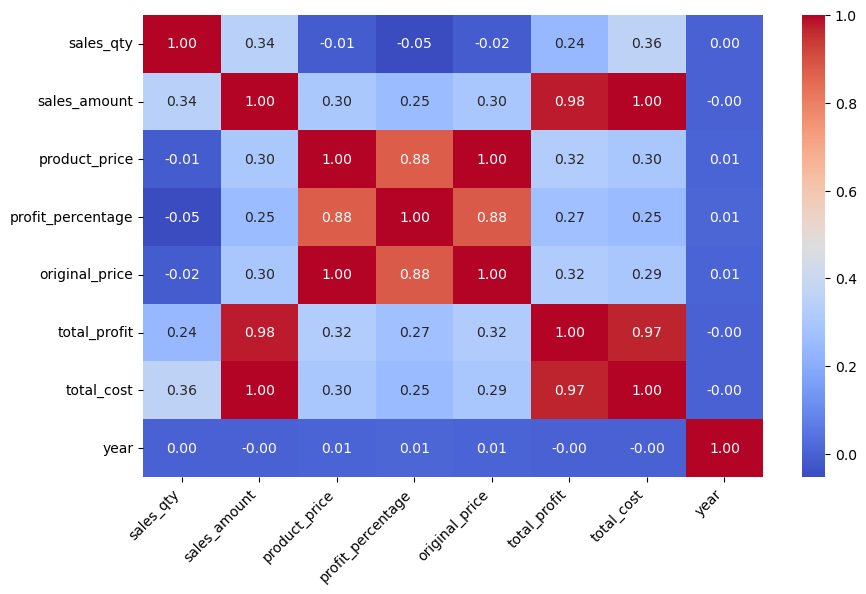

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size (width=10, height=6 in inches)
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")

# Rotate y-axis labels
plt.yticks(rotation=0)

# Show the plot
plt.show()